In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\UPSIT
df = pd.read_csv ("UPSIT3Categ_Methylome_Male.csv")
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\UPSIT
(307, 5679)


,Sentrix,PATNO,HYS,Gender,APPRDX,UPSIT_3,UPSIT_Total,cg06067658,cg15442538,cg25928446,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,200991620021_R01C01,3001,2,1,1,1,25,0.088679,0.890148,0.719238,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,200973410167_R04C01,3007,2,1,1,2,18,0.128668,0.916448,0.726893,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [3]:
df1 = df[df.PATNO != 4079]

In [4]:
df_data = df1.drop(['PATNO', 'Sentrix', 'HYS', 'Gender', 'UPSIT_3','UPSIT_Total','APPRDX'], axis=1)
df_data.head(2)

,cg06067658,cg15442538,cg25928446,cg12415575,cg26358225,cg19058526,cg20195763,cg23725394,cg27107076,cg15657055,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,0.088679,0.890148,0.719238,0.066678,0.151532,0.133249,0.479724,0.926745,0.538423,0.697562,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,0.128668,0.916448,0.726893,0.066768,0.198886,0.141136,0.412058,0.876792,0.665097,0.797354,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [5]:
# Perform PCA and save first 50 PCs
pca = PCA(n_components=50)
pca.fit(df_data)
pca_components = pca.transform(df_data)
df_pca = pd.DataFrame(data=pca_components, columns=[f"PC{i}" for i in range(1, 51)])

# Add targets to PCA dataframe
df_pca["APPRDX"] = df1["APPRDX"]

In [6]:
# Print summary of PCA results
print("PCA explained variance ratio:", pca.explained_variance_ratio_)
# total = 0.757

PCA explained variance ratio: [0.13633155 0.08441189 0.05603154 0.02744378 0.02238754 0.01861411
 0.01625295 0.01442209 0.01380576 0.01356225 0.01243467 0.01191798
 0.01132433 0.01032154 0.01007379 0.0096004  0.00951642 0.00900281
 0.00864675 0.00824513 0.00805449 0.00727198 0.00717383 0.00696177
 0.00676844 0.00656487 0.00646325 0.00631482 0.00607876 0.00597965
 0.00587178 0.00578464 0.00552717 0.00542157 0.00526927 0.00512407
 0.00496998 0.00493102 0.0048143  0.00474835 0.00472608 0.00443124
 0.00437803 0.00423419 0.00413576 0.00399246 0.00394548 0.00390027
 0.00375899 0.00362224]


In [7]:
# Display PCA dataframe
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.519308  0.338740 -0.398345 -0.462840 -0.455092  0.916619  0.031168   
1  1.431715  0.471253  0.497882  1.209455  0.035025  1.233256 -0.430473   
2  1.577456 -0.388465  0.849215  0.934123 -0.044960  1.252003 -0.444103   
3 -1.868123  0.464867 -0.873979  0.683954  0.228349 -0.218340 -0.093813   
4 -0.270381 -0.458636 -1.011067 -0.642222  0.020451 -0.082880  0.470505   

        PC8       PC9      PC10  ...      PC42      PC43      PC44      PC45  \
0 -0.204201 -0.477214  0.529315  ... -0.190086  0.011408  0.173058 -0.397941   
1  0.089904  0.587457  0.534835  ...  0.289981 -0.157645 -0.125028  0.070110   
2  0.258749  0.726177  0.533973  ... -0.233292  0.372361 -0.116278 -0.038089   
3  0.437193 -0.342042  0.325711  ...  0.159660 -0.007995 -0.070830  0.026585   
4 -0.296484  0.862744 -0.080881  ...  0.047869 -0.065070  0.487566 -0.208459   

       PC46      PC47      PC48      PC49      PC50  APPRDX  
0  0.0

In [8]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#F1746B', markersize=30, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#36C3D1', markersize=30, color='floralwhite')]

In [9]:
import umap

# Perform UMAP on first 50 PCs
umap_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=1).fit_transform(df_pca.iloc[:, :-1])


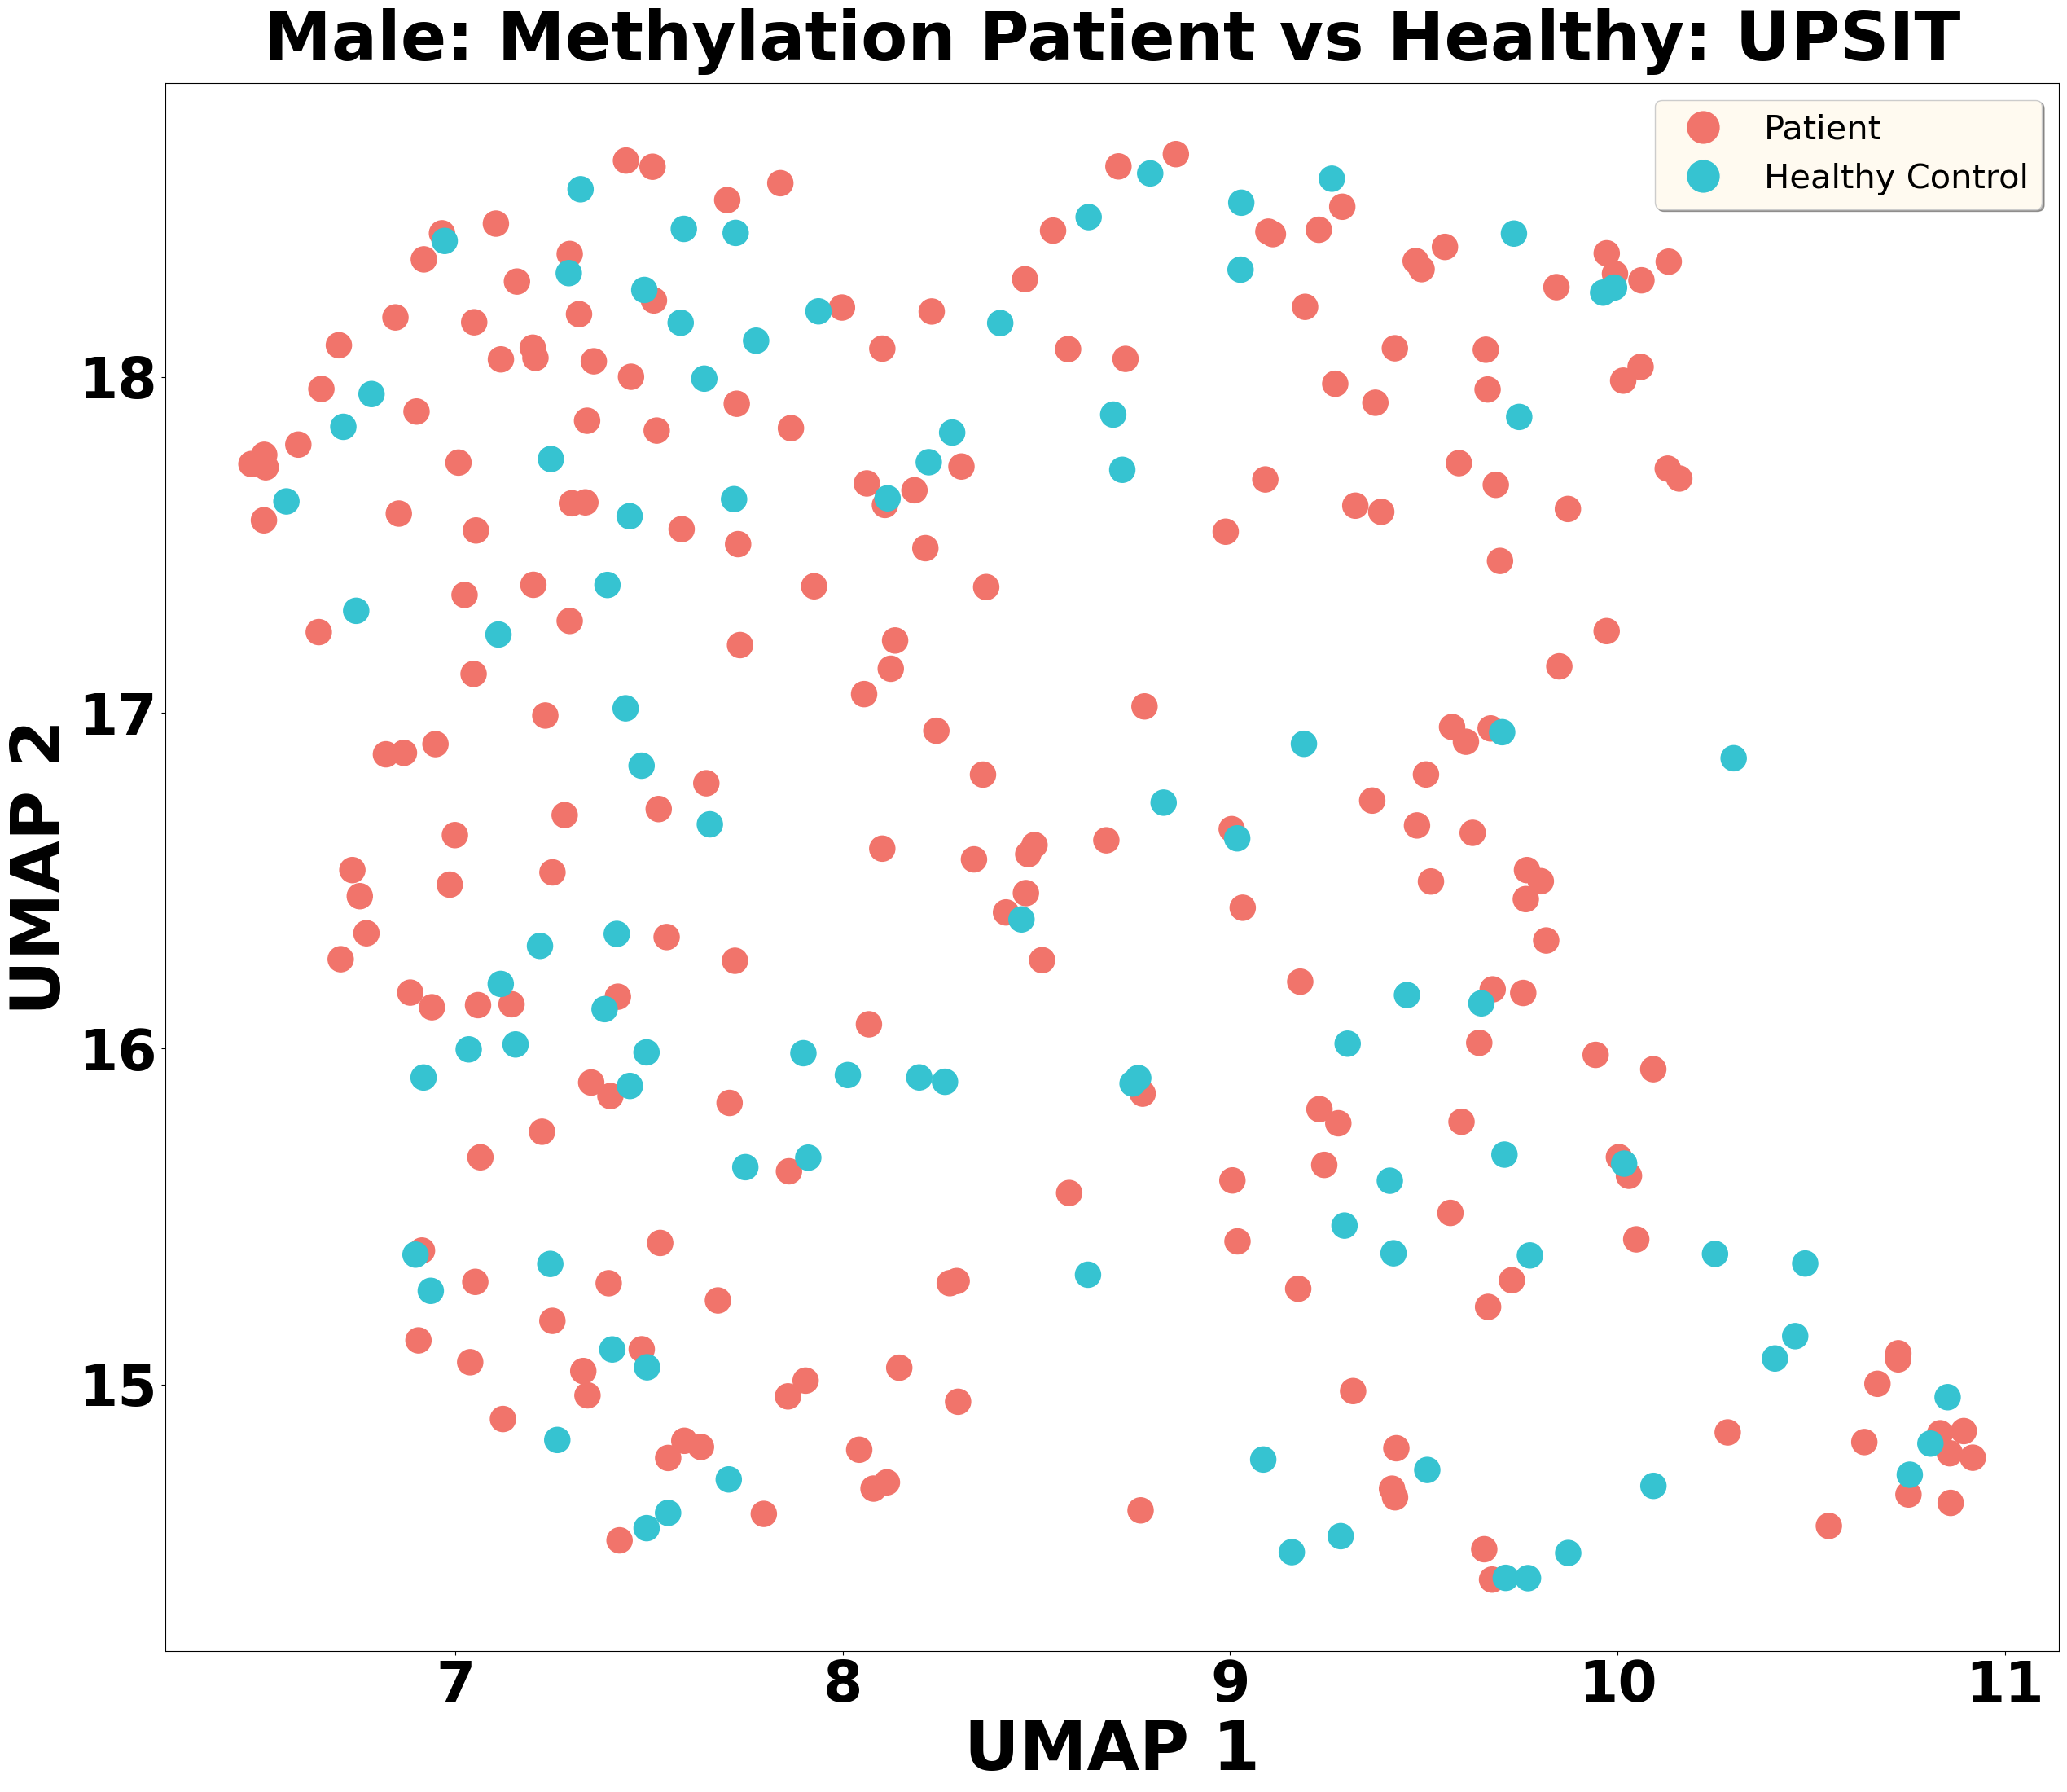

In [11]:
# Plot results
colors = {"1": "#F1746B", "2": "#36C3D1"}
plt.figure(figsize=(30, 25))  # Modify the size of the figure
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df_pca["APPRDX"].astype(str).map(colors), s=500)
plt.xlabel('UMAP 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ["Patient", "Healthy Control"], loc="upper right", shadow=True, 
           facecolor="floralwhite", prop={"size": 30})
plt.title(label="Male: Methylation Patient vs Healthy: UPSIT", fontsize=60, fontweight='bold',
          color="black", pad=20)
plt.savefig("UMAP_on50PCA_CpG_PatVsHealthy_UPSIT.pdf", format="pdf")
plt.savefig("UMAP_on50PCA_CpG_PatVsHealthy_UPSIT.svg", format="svg")
plt.show()


In [12]:
# Perform PCA and save first 100 PCs
pca = PCA(n_components=100)
pca.fit(df_data)
pca_components = pca.transform(df_data)
df_pca = pd.DataFrame(data=pca_components, columns=[f"PC{i}" for i in range(1, 101)])

# Add targets to PCA dataframe
df_pca["APPRDX"] = df1["APPRDX"]

In [13]:
# Print summary of PCA results
print("PCA explained variance ratio:", pca.explained_variance_ratio_)
# total = 0.999
# Display PCA dataframe
print(df_pca.head())

PCA explained variance ratio: [0.13633155 0.08441189 0.05603154 0.02744378 0.02238754 0.01861411
 0.01625296 0.01442211 0.0138058  0.01356233 0.01243475 0.01191801
 0.01132447 0.01032167 0.010074   0.00960069 0.00951664 0.00900344
 0.00864725 0.00824641 0.00805662 0.00728221 0.00717828 0.00696367
 0.0067805  0.00656925 0.00647    0.00632223 0.00608677 0.00599075
 0.00588203 0.00579653 0.00553552 0.00544852 0.00528498 0.00514176
 0.00505816 0.00495784 0.00485082 0.00479937 0.00476151 0.00447636
 0.00446839 0.00430384 0.00421671 0.00409437 0.00406392 0.00399576
 0.00387315 0.00384712 0.00376523 0.00366959 0.0036081  0.00352363
 0.00351017 0.00343041 0.00337895 0.00334505 0.00325975 0.00321248
 0.00316823 0.00312222 0.00309083 0.00300049 0.00297027 0.00290943
 0.00288876 0.00287418 0.00283608 0.00281978 0.00274303 0.00270437
 0.00268098 0.00264742 0.00259542 0.0025705  0.00253944 0.00249953
 0.0024461  0.00240829 0.00237855 0.00235928 0.00231572 0.00229273
 0.00225419 0.00225354 0.0022128

In [14]:

# Perform UMAP on first 100 PCs
umap_embedding = umap.UMAP(n_neighbors=20, min_dist=0.5, n_components=2, random_state=1).fit_transform(df_pca.iloc[:, :-1])


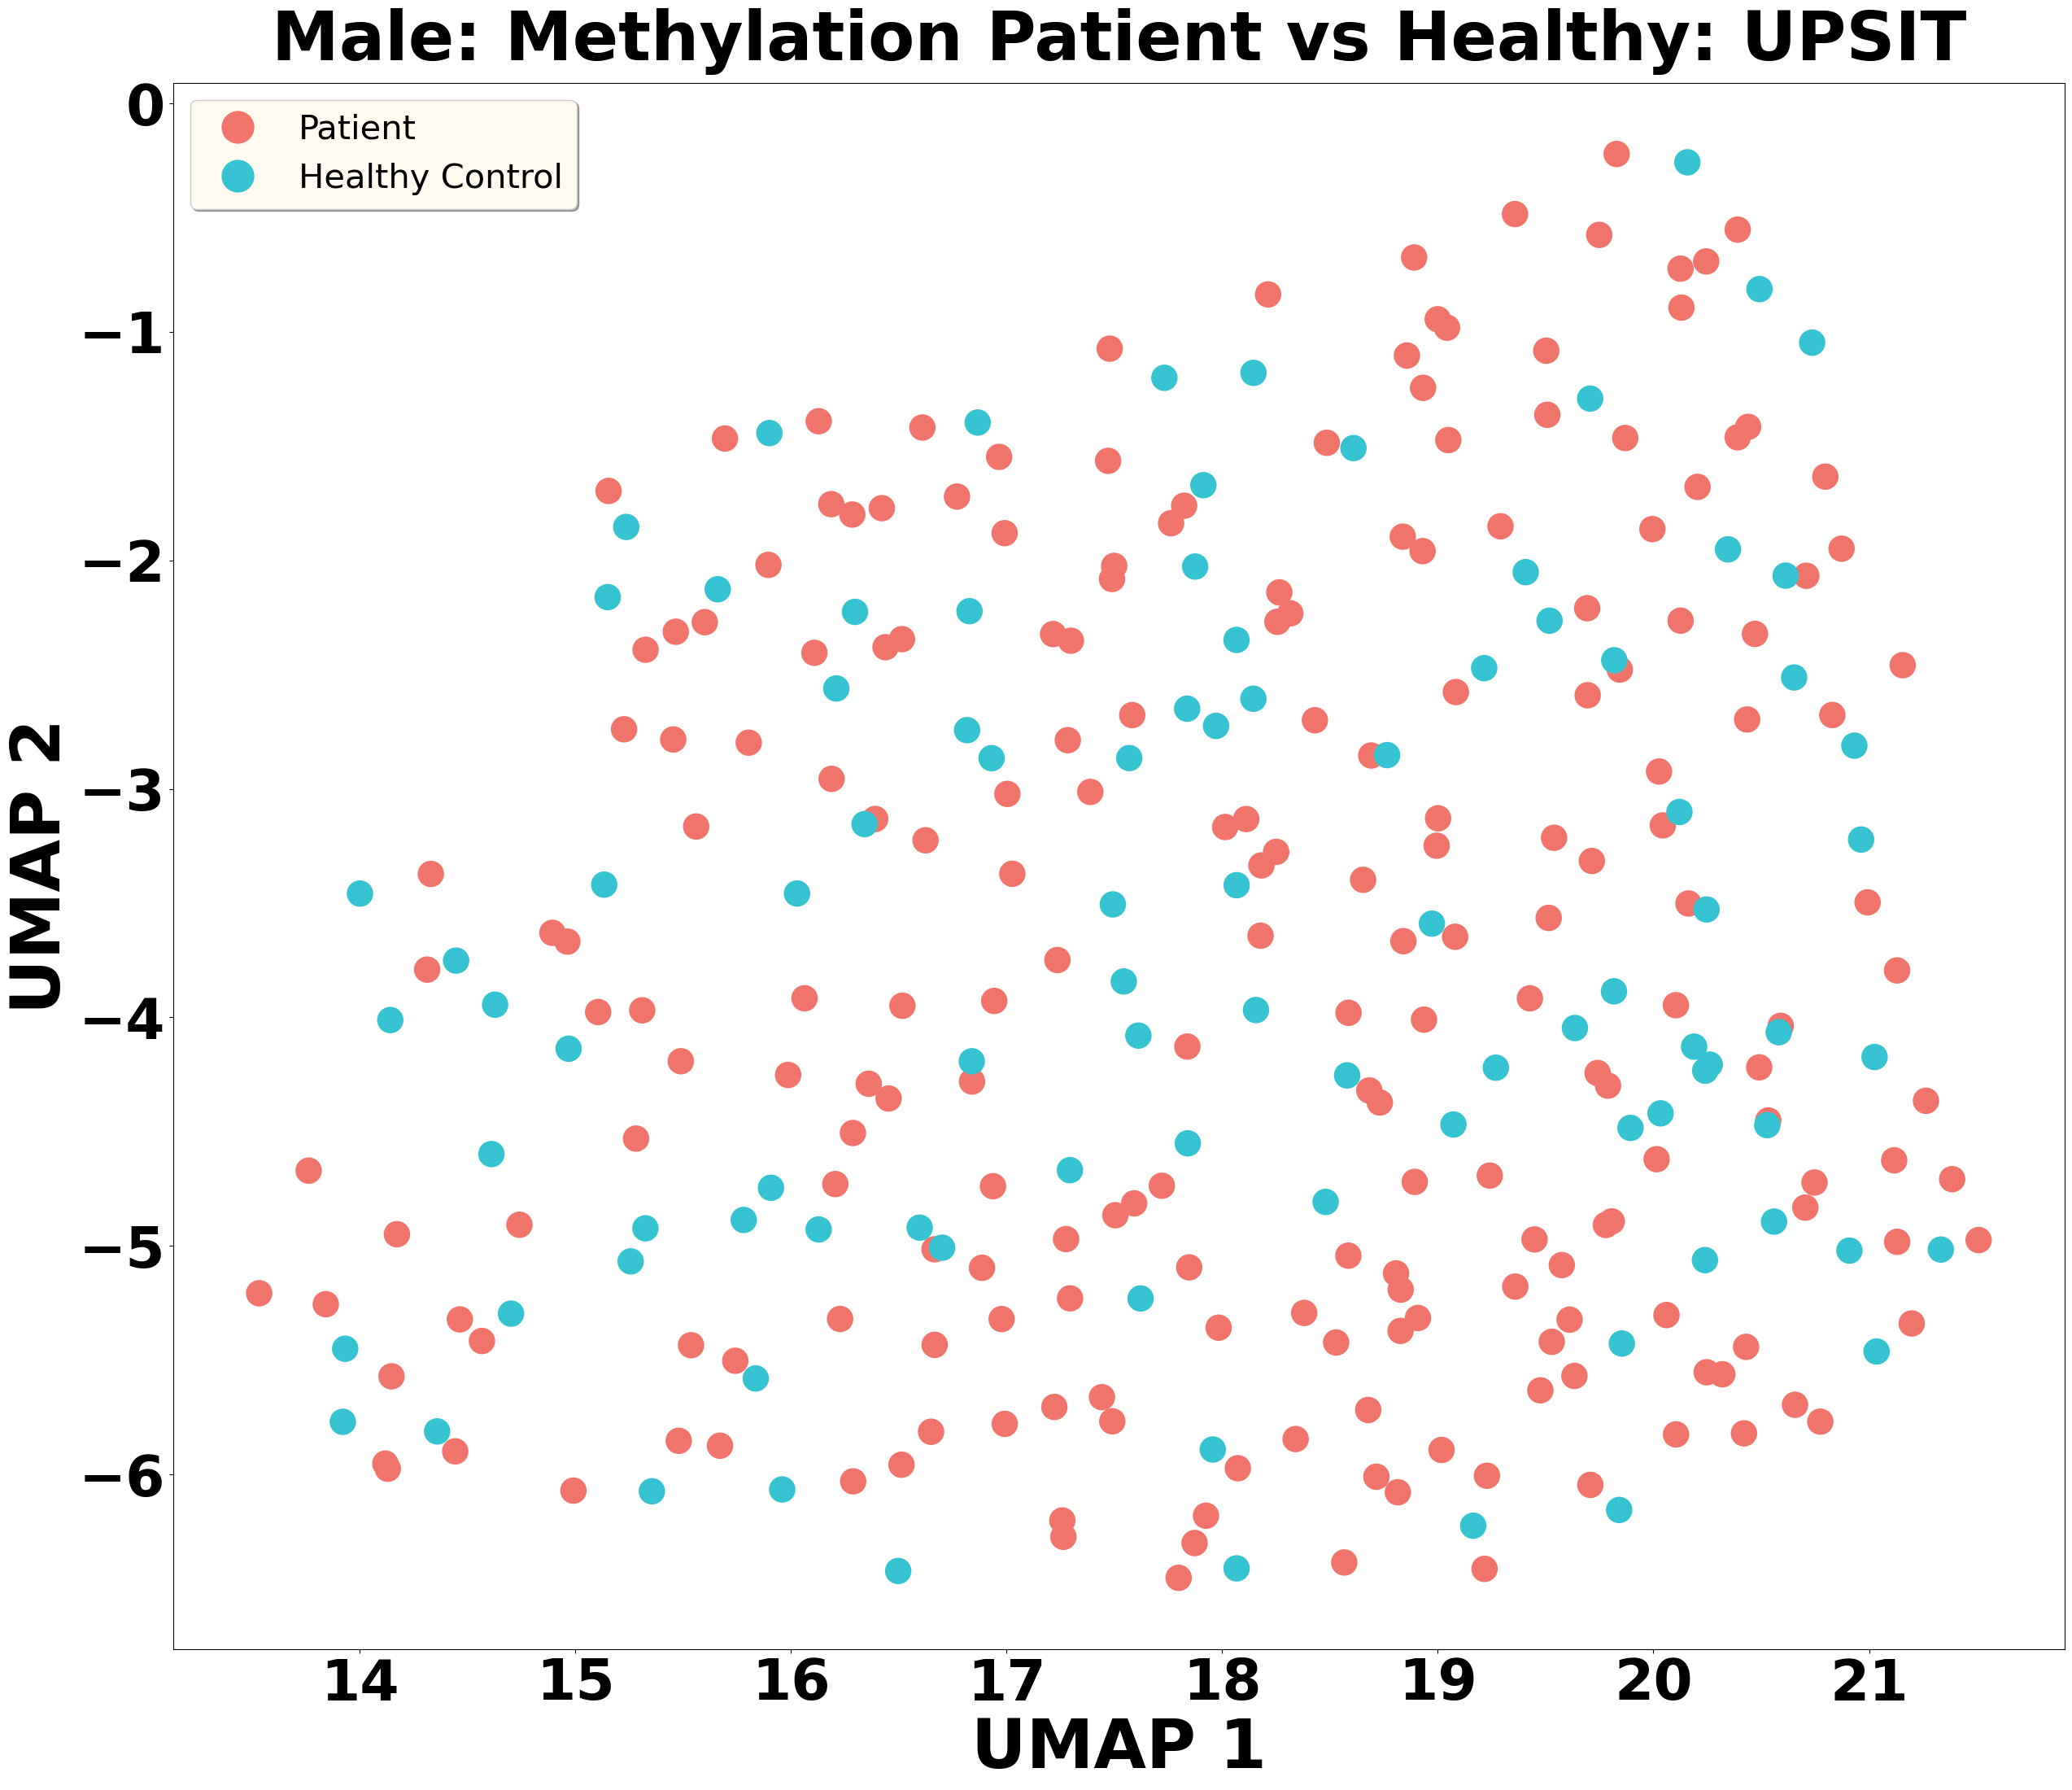

In [15]:
# Plot results
colors = {"1": "#F1746B", "2": "#36C3D1"}
plt.figure(figsize=(30, 25))  # Modify the size of the figure
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df_pca["APPRDX"].astype(str).map(colors), s=500)
plt.xlabel('UMAP 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ["Patient", "Healthy Control"], loc="upper left", shadow=True, 
           facecolor="floralwhite", prop={"size": 30})
plt.title(label="Male: Methylation Patient vs Healthy: UPSIT", fontsize=60, fontweight='bold',
          color="black", pad=20)
plt.savefig("UMAP_on100PCA_CpG_PatVsHealthy_UPSIT.pdf", format="pdf")
plt.savefig("UMAP_on100PCA_CpG_PatVsHealthy_UPSIT.svg", format="svg")
plt.show()


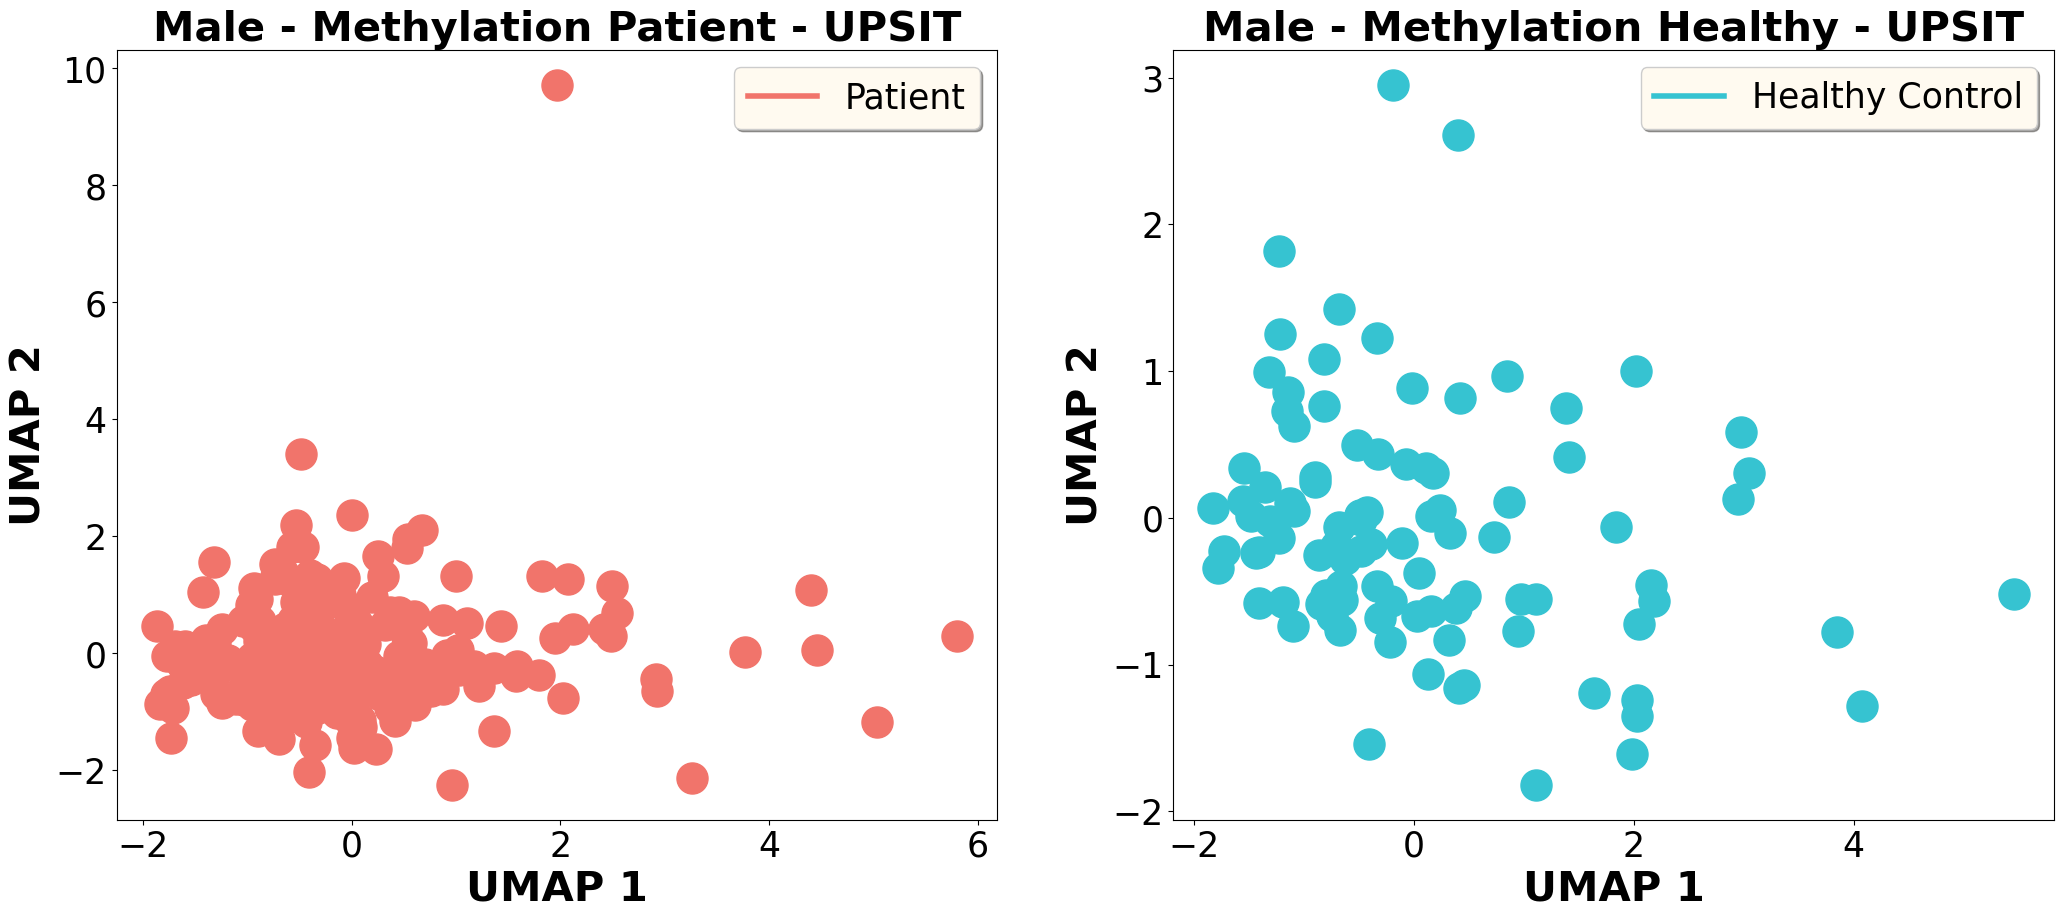

In [17]:
# Separate the data into "Patient" and "Healthy" categories
df_patient = df_pca[df_pca["APPRDX"] == 1]
df_healthy = df_pca[df_pca["APPRDX"] == 2]

# Set up the custom legend lines
custom_lines_patient = [Line2D([0], [0], color='#F1746B', lw=4)]
custom_lines_healthy = [Line2D([0], [0], color='#36C3D1', lw=4)]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

# Plot for "Patient" category
ax1.scatter(df_patient["PC1"], df_patient["PC2"], c='#F1746B', s=500)
ax1.set_title("Male - Methylation Patient - UPSIT", fontweight='bold', fontsize=30)
ax1.set_xlabel("UMAP 1", fontweight='bold', fontsize=30)
ax1.set_ylabel("UMAP 2", fontweight='bold', fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.legend(custom_lines_patient, ["Patient"], loc="upper right", shadow=True, facecolor="floralwhite", 
           prop={"size": 25})

# Plot for "Healthy" category
ax2.scatter(df_healthy["PC1"], df_healthy["PC2"], c='#36C3D1', s=500)
ax2.set_title("Male - Methylation Healthy - UPSIT", fontweight='bold', fontsize=30)
ax2.set_xlabel("UMAP 1", fontweight='bold', fontsize=30)
ax2.set_ylabel("UMAP 2", fontweight='bold', fontsize=30)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.legend(custom_lines_healthy, ["Healthy Control"], loc="upper right", shadow=True, facecolor="floralwhite", 
           prop={"size": 25})

# Save and show the plot
plt.savefig("UMAP_on100PCA_CpG_PatVsHealthy_UPSIT_separate.pdf", format="pdf")
plt.savefig("UMAP_on100PCA_CpG_PatVsHealthy_UPSIT_separate.svg", format="svg")
plt.show()
